In [2]:
from arviz import hdi
import pyabc
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix2
import scipy
import numpy as np
from pyabc.visualization import plot_kde_matrix_highlevel
from datetime import datetime
import pandas as pd
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix
import matplotlib.pyplot as plt
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix, plot_kde_2d

output_path = '../../figures'
path = '/Users/adsurbum/sim-data/single-model-abc/new4'
file_name = '2021-12-29-an200-k1'

history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,file_name))
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2021-12-29 04:47:34.853143,200,inf,1
1,0,2021-12-29 10:54:43.770932,393,0.746575,200
2,1,2021-12-29 11:53:27.456808,4967,0.360622,836
3,2,2021-12-29 13:38:29.537354,9109,0.197467,1059
4,3,2021-12-29 16:37:20.673694,16125,0.145762,1111
5,4,2021-12-29 21:50:47.240188,27629,0.131083,964
6,5,2021-12-30 08:00:52.829615,53803,0.126588,982


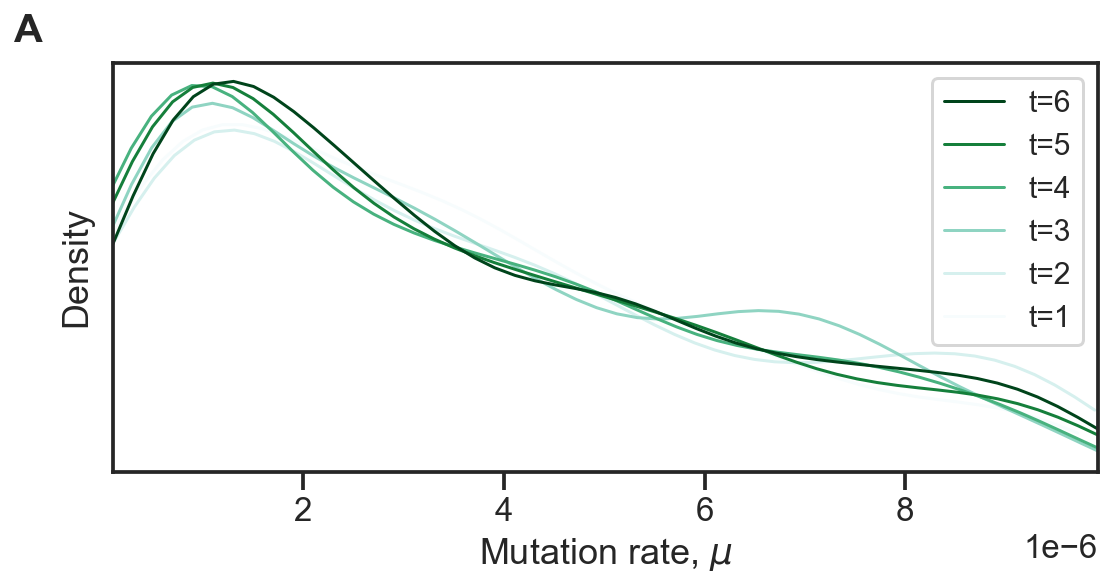

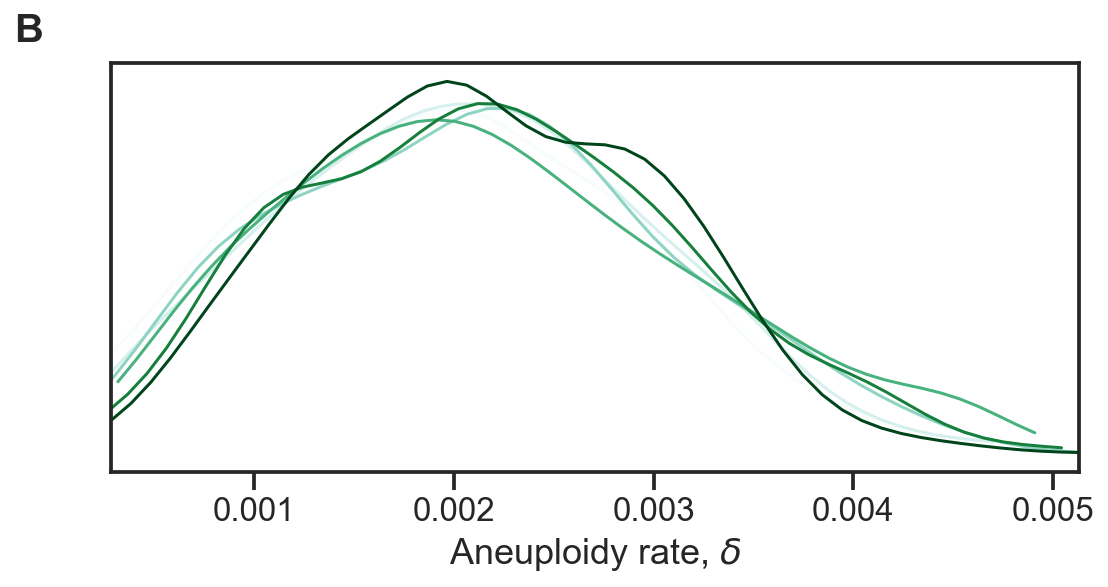

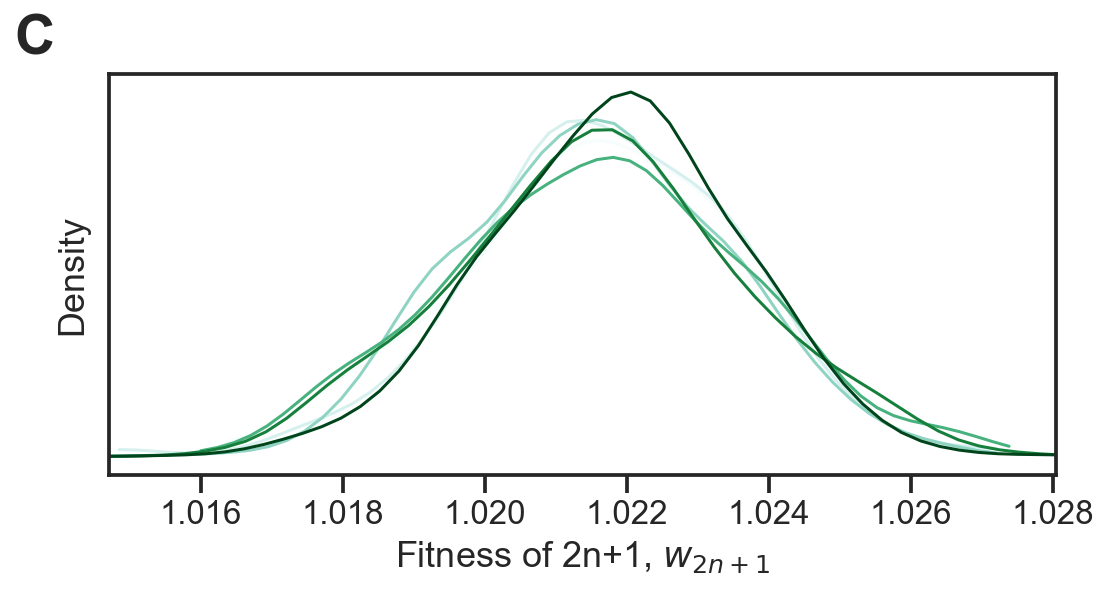

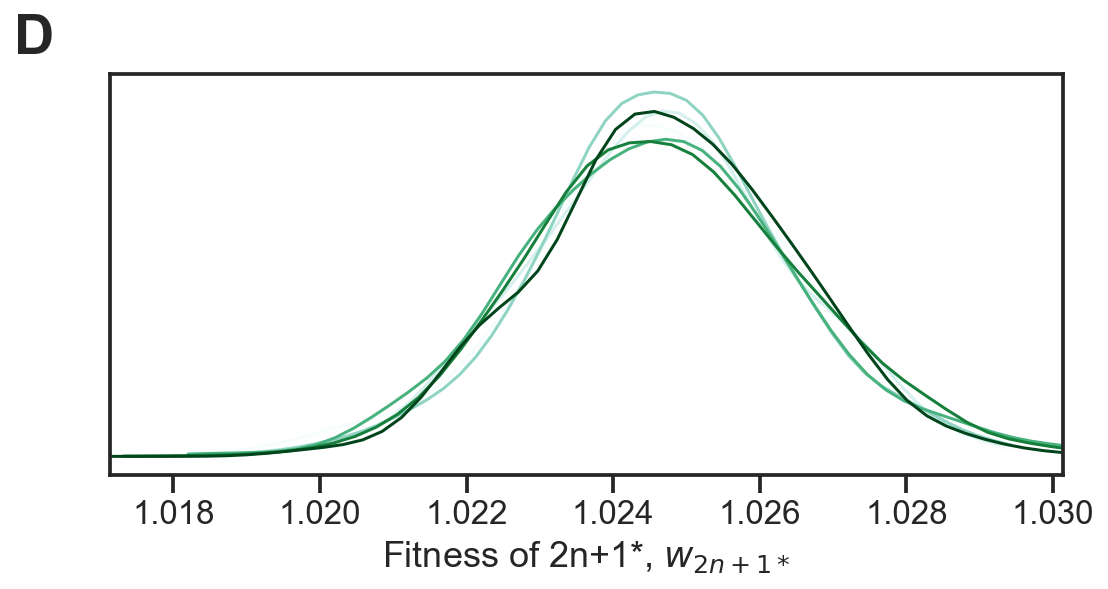

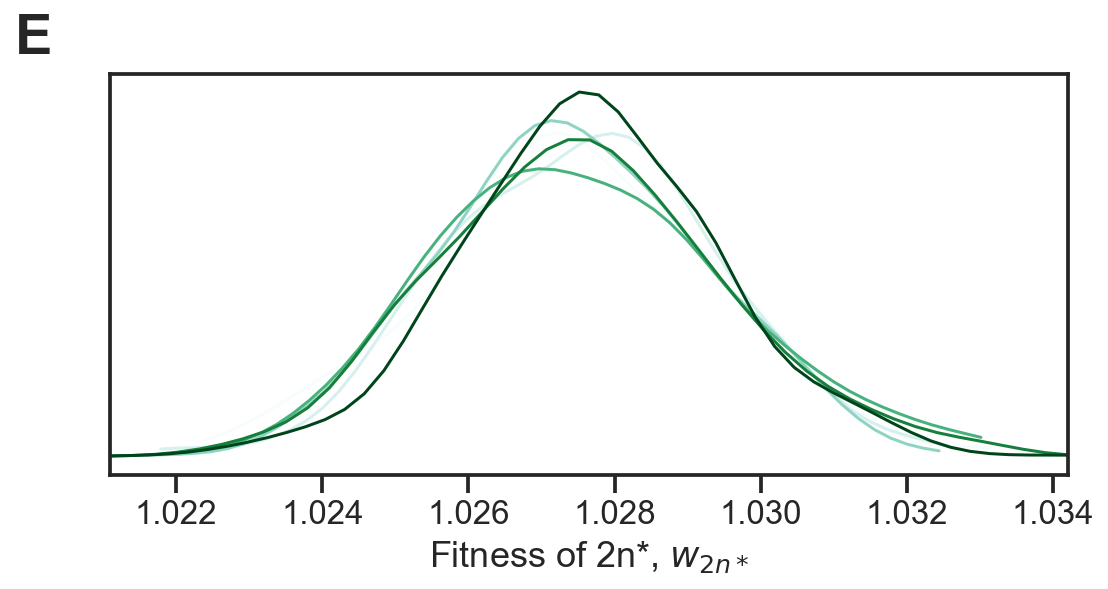

In [5]:
import seaborn as sns
import string
from numpy import linspace
from matplotlib import cm
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.5, 'lines.markersize': 7})

def compare(history, p, c, ax):
    l = len(history.get_all_populations())-1
#     l=3
    cm_subsection = linspace(0.0, 1.0, l) 
    colors = [ cm.BuGn(x) for x in cm_subsection]
    
    df, w = history.get_distribution(m=0, t=None)
    xmin = min(df[p])
    xmax = max(df[p])
    ax.set_xlim(xmin, xmax)
    ax.axes.yaxis.set_ticks([])
    
    for t,color in zip(range(l,), colors):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(
            df,
            w,
            x=p,
            xname=c,
            ax=ax,
            label=f"t={t+1}",
            color=color,
        )

        
history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path, file_name))
samples, weights = history.get_distribution(m=0, t=None)
c = ['Mutation rate, $\mu$', 'Aneuploidy rate, $\delta$', 'Fitness of 2n+1, $w_{2n+1}$', 
     'Fitness of 2n+1*, $w_{2n+1*}$', 'Fitness of 2n*, $w_{2n*}$']
p_to_c = {p:c for p,c in zip(list(samples.columns),c)} #param name of samples to column name that should be shown

showLegend = True
for t, p in enumerate(samples.columns.values):
    fig, ax = plt.subplots(figsize=(8,4.5))
    compare(history, p, p_to_c[p], ax)
    if showLegend:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=15, handles=handles[::-1]);
        showLegend=False
    ax.set_ylabel("Density" if t==0 or t==2 else "", labelpad=10)    
    ax.text(-0.1, 1.05, string.ascii_uppercase[t], transform=ax.transAxes, size=20 if t<2 else 28, weight='bold')
    fig.tight_layout()
    plt.gcf().savefig(f'{output_path}/convergence-{p}.pdf', bbox_inches='tight', dpi=100)


(5.0, 0.12658755968199997)
(5, 0.018251770347378397)
(5, 651.1408512462433)
(6, 982)


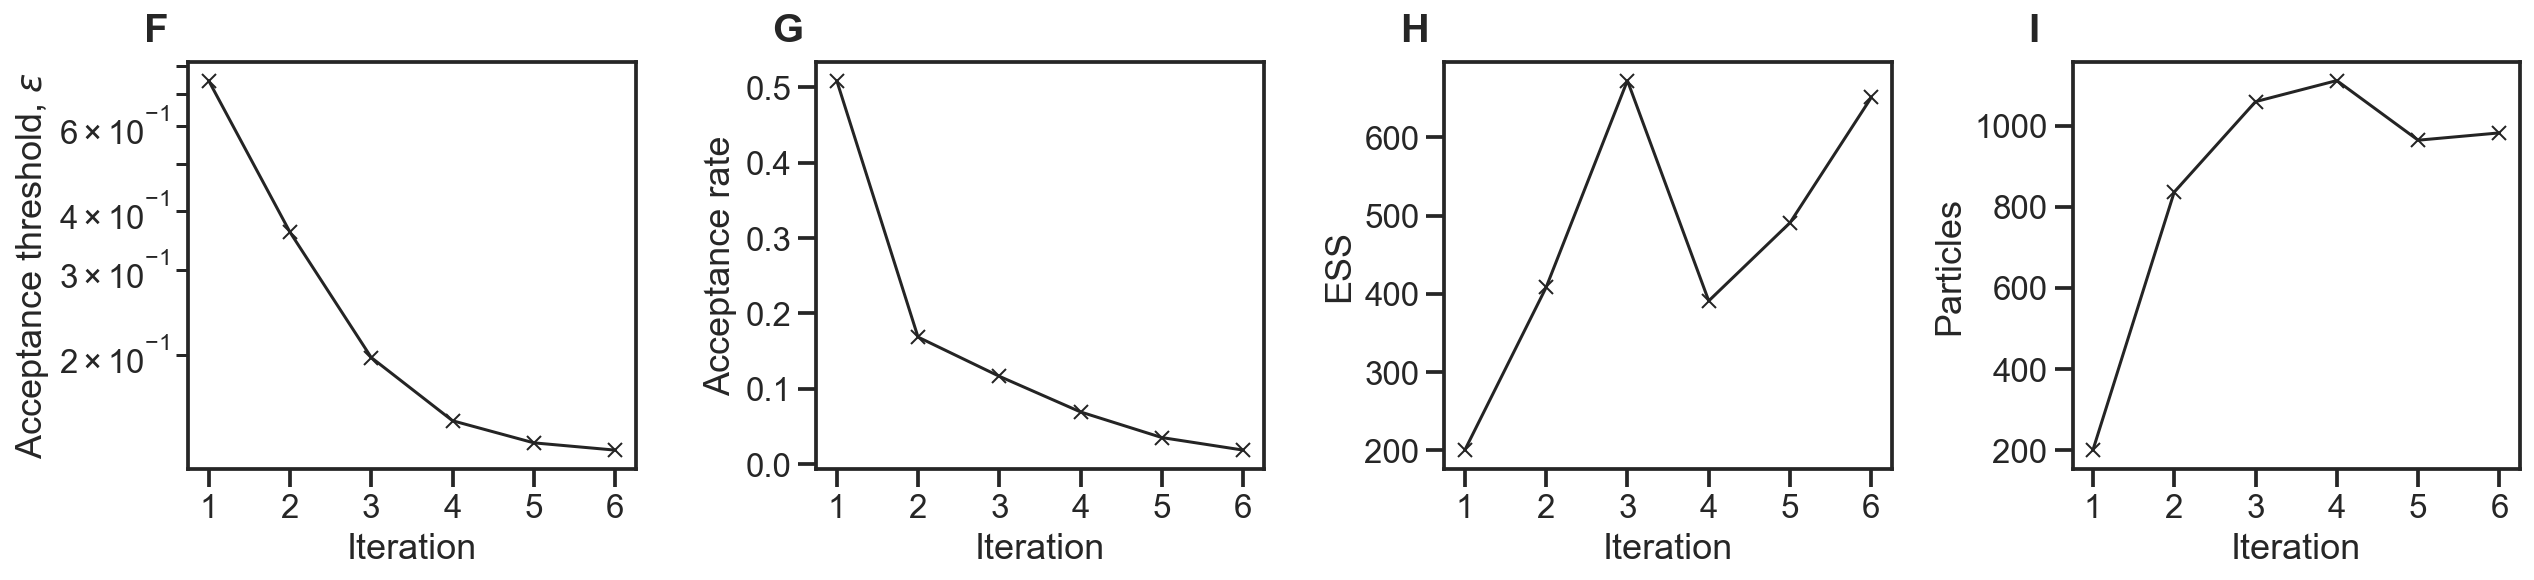

In [3]:
import seaborn as sns
# sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 2.5, 'lines.markersize': 7})
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.5, 'lines.markersize': 7})

sns.set_palette("gray")
def plotESS(history, size=(12,4)):
    samples, weights = history.get_distribution(m=0, t=None)

    fig, arr_ax = plt.subplots(1, 4, figsize=size)

#     pyabc.visualization.plot_sample_numbers(history, ax=arr_ax[0])    
    ax = arr_ax[0]
    pyabc.visualization.plot_epsilons(history, ax=ax, title = None)
    ax.set_ylabel("Acceptance threshold, $\epsilon$");
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([1,2,3,4,5,6])
    ax.set_xlabel("Iteration")
    ax.text(-0.1, 1.05, 'F', transform=ax.transAxes, size=20, weight='bold')
    
    ax = arr_ax[1]
    pyabc.visualization.plot_acceptance_rates_trajectory(history, ax=ax, title = None)
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([1,2,3,4,5,6])
    ax.legend_ = None
    ax.set_xlabel("Iteration")
    ax.text(-0.1, 1.05, 'G', transform=ax.transAxes, size=20, weight='bold')
    
    ax = arr_ax[2]
    pyabc.visualization.plot_effective_sample_sizes(history, ax=ax, title = None)
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([1,2,3,4,5,6])
    ax.set_xlabel("Iteration")
#     arr_ax[2].lines[0].set_linestyle('')
    ax.text(-0.1, 1.05, 'H', transform=ax.transAxes, size=20, weight='bold')

    
    ax = arr_ax[3]
    populations = history.get_all_populations()
    ax.plot([1,2,3,4,5,6],populations[populations.t >= 0].particles.values,'x-')
    ax.set_ylabel("Particles");
    ax.set_xticks([1,2,3,4,5,6]) 
    ax.set_xlabel("Iteration")
    ax.text(-0.1, 1.05, 'I', transform=ax.transAxes, size=20, weight='bold')

    
    for ax in arr_ax:
        print(list(zip(ax.lines[0].get_xdata(),ax.lines[0].get_ydata()))[-1])

    fig.tight_layout()
    
plotESS(history, size = [18,4.4])
plt.tight_layout()
plt.gcf().savefig(f'{output_path}/ess.pdf', bbox_inches='tight', dpi=100)